In [1]:
import pandas

In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [3]:
df=pandas.read_csv("data.csv")

In [4]:
df.head(20)

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
6,https://www.nytimes.com/2017/10/10/us/politics...,Kansas Tried a Tax Plan Similar to Trump’s. It...,"In 2012, Kansas lawmakers, led by Gov. Sam Bro...",1
7,https://www.reuters.com/article/us-india-cenba...,"India RBI chief: growth important, but not at ...",The Reserve Bank of India (RBI) Governor Urjit...,1
8,https://www.reuters.com/article/us-climatechan...,EPA chief to sign rule on Clean Power Plan exi...,"Scott Pruitt, Administrator of the U.S. Enviro...",1
9,https://www.reuters.com/article/us-air-berlin-...,Talks on sale of Air Berlin planes to easyJet ...,FILE PHOTO - An Air Berlin sign is seen at an ...,1


In [5]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 4 columns):
URLs        4008 non-null object
Headline    4008 non-null object
Body        3987 non-null object
Label       4008 non-null int64
dtypes: int64(1), object(3)
memory usage: 125.3+ KB
None


In [7]:
print(df.groupby('Label').size())

Label
0    2136
1    1872
dtype: int64


In [8]:
X = df[['URLs','Headline','Body']]
Y = df['Label']
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.3, random_state=7)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
count_vectorizer = CountVectorizer()
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_validation)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS

In [12]:
comment_words = ' '
stopwords = set(STOPWORDS) 

In [13]:
tokens = " ".join(str(review for review in df.Body).lower())

for words in tokens: 
    comment_words = comment_words + words + ' '

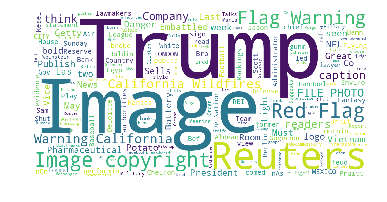

In [14]:
wordcloud = WordCloud(width = 1000, height = 500, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(str(df.Body))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.png',dpi=500)
plt.show()

In [15]:
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('puntk')
nltk.download('stopwords')

[nltk_data] Error loading puntk: Package 'puntk' not found in index
[nltk_data] Downloading package stopwords to C:\Users\Kushal
[nltk_data]     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def check(x):
    if x==1:
        return 'Real'
    else:
        return 'False'

In [17]:
df['ForR'] = df['Label'].apply(check)

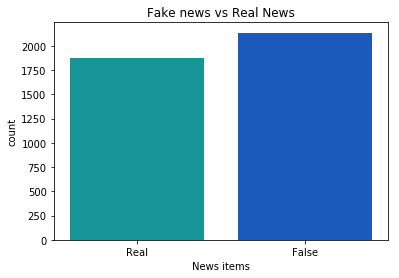

In [18]:
sns.countplot(df['ForR'], palette="winter_r")
plt.title('Fake news vs Real News')
plt.xlabel('News items')
plt.savefig('Barchart.png')
plt.show()

In [19]:
real_text = ' '.join(df[df['Label'] == 1]['Headline'])
fake_text = ' '.join(df[df['Label'] == 0]['Headline'])
fake_words = [word for word in nltk.tokenize.word_tokenize(fake_text) if word not in stopwords.words('english') and len(word) > 3]
real_words = [word for word in nltk.tokenize.word_tokenize(real_text) if word not in stopwords.words('english') and len(word) > 3]

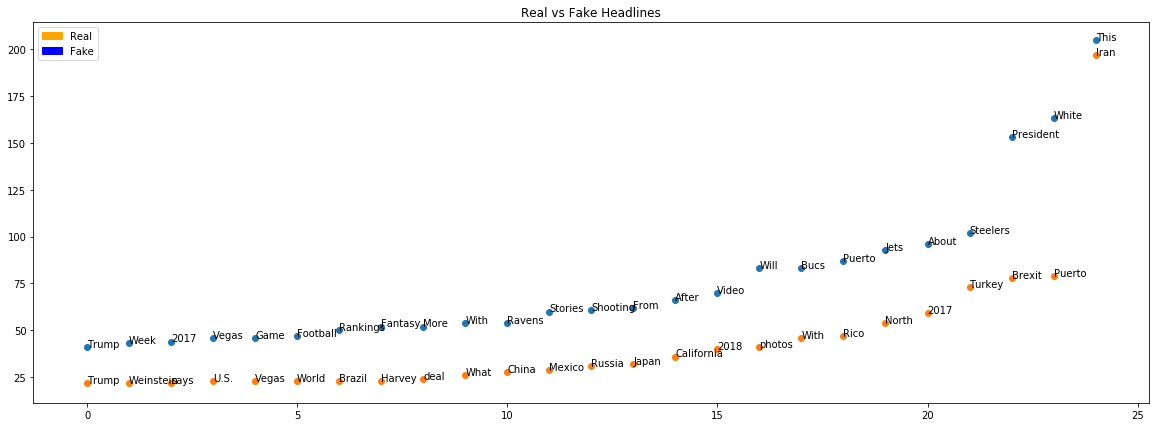

In [20]:
common_fake = nltk.FreqDist(fake_words).most_common(25)
common_real =nltk.FreqDist(real_words).most_common(25)
fake_ranks = []
fake_counts = []
real_ranks = []
real_counts = []

for ii, word in enumerate(reversed(common_fake)):
    fake_ranks.append(ii)
    fake_counts.append(word[1])

for ii, word in enumerate(reversed(common_real)):
    real_ranks.append(ii)
    real_counts.append(word[1])

plt.figure(figsize=(20, 7))

plt.scatter(fake_ranks, fake_counts)

for labels, fake_rank, fake_count in zip(common_fake, fake_ranks, fake_counts):
    plt.annotate(
        labels[0],
        xy = (fake_rank, fake_count)
    )

plt.scatter(real_ranks, real_counts)
plt.title('Real vs Fake Headlines')

for labels, real_rank, real_count in zip(common_real, real_ranks, real_counts):
    plt.annotate(
        labels[0],
        xy = (real_rank, real_count)
    )
    
real_patch = mpatches.Patch(color='orange', label='Real')
fake_patch = mpatches.Patch(color='blue', label='Fake')
plt.legend(handles=[real_patch, fake_patch])
plt.savefig('scatter plot.png')
plt.show()